In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./train_final.csv')

Бабин Я.В.

In [ ]:
columns = ["booking_changes", "deposit_type", "days_in_waiting_list", "customer_type", "adr"]

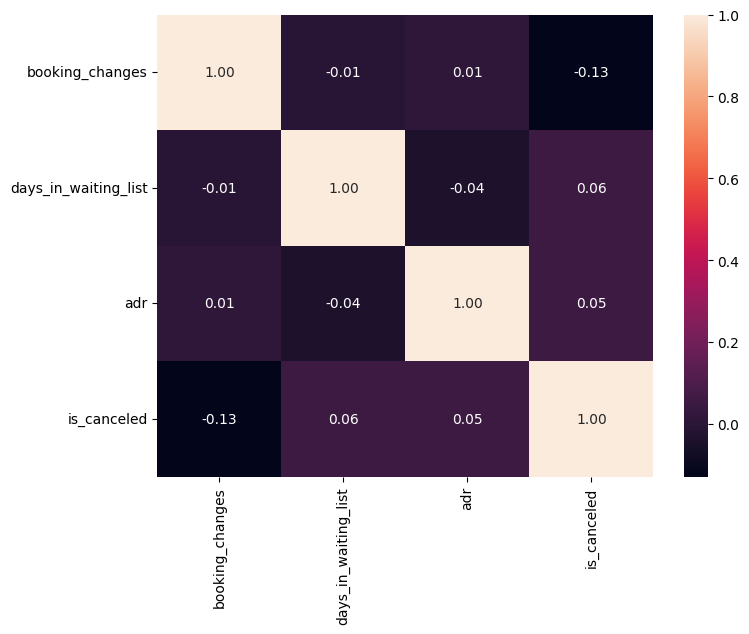

In [ ]:
corr = df[columns + ["is_canceled"]].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

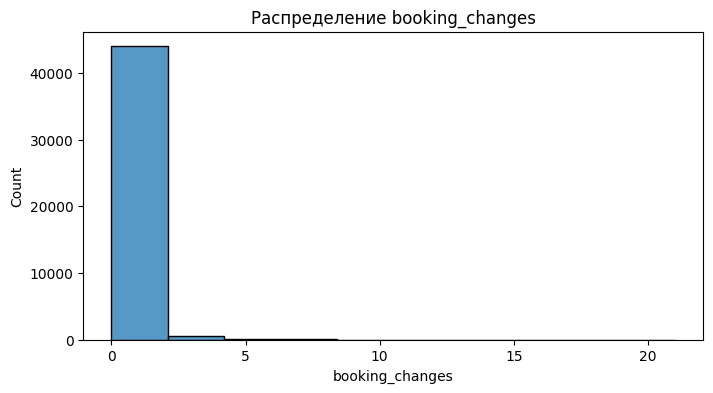

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["booking_changes"].dropna(), bins=10)
plt.title("Распределение booking_changes")
plt.xlabel("booking_changes")
plt.show()

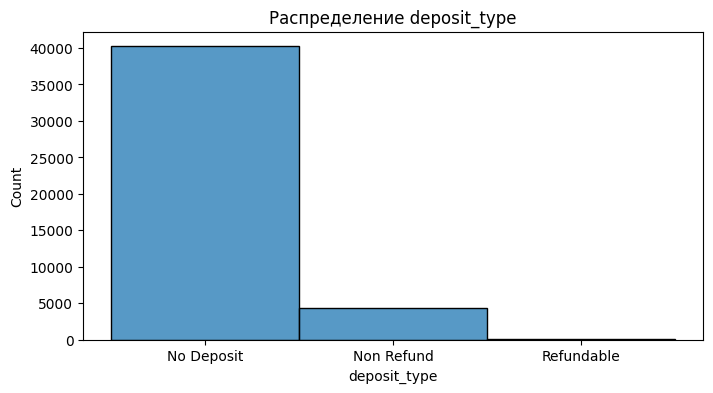

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["deposit_type"].dropna(), bins=10)
plt.title("Распределение deposit_type")
plt.xlabel("deposit_type")
plt.show()

In [ ]:
e_df = df[df["deposit_type"] == "Non Refund"]
e_df["is_canceled"].value_counts()

,count
is_canceled,
1,4295
0,44


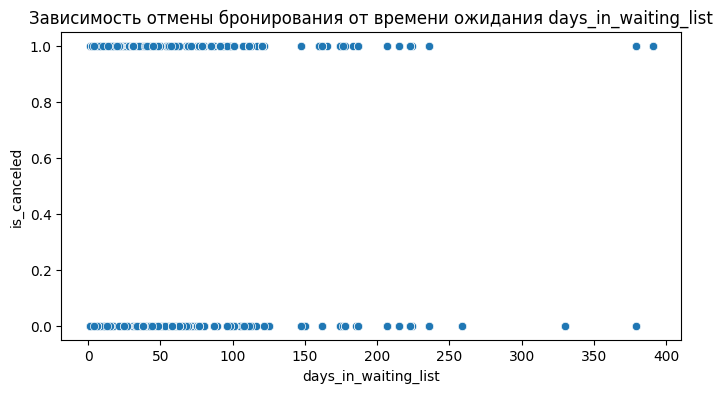

In [ ]:
e_df = df[df["days_in_waiting_list"] != 0]
plt.figure(figsize=(8,4))
sns.scatterplot(data=e_df, x="days_in_waiting_list", y="is_canceled")
plt.title("Зависимость отмены бронирования от времени ожидания days_in_waiting_list")
plt.show()

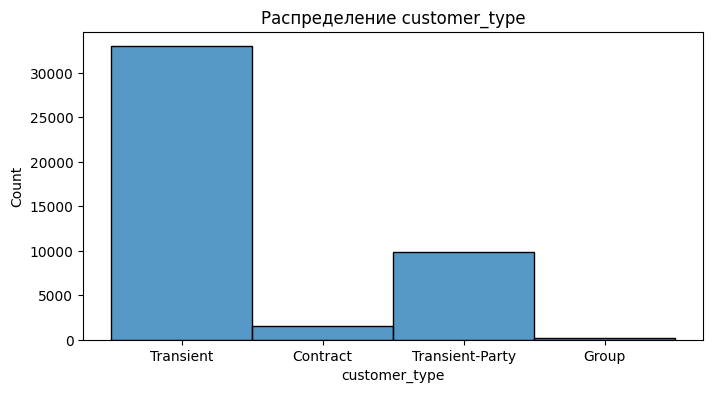

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["customer_type"].dropna(), bins=10)
plt.title("Распределение customer_type")
plt.xlabel("customer_type")
plt.show()

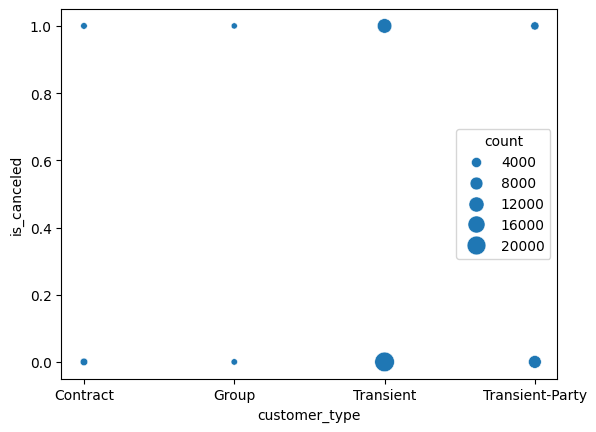

In [ ]:
e_df = df.groupby(["customer_type", "is_canceled"]).size().reset_index(name="count")
sns.scatterplot(data=e_df, x="customer_type", y="is_canceled", size="count", sizes=(20, 200))
plt.show()

In [ ]:
for t in df["customer_type"].unique():
    corr_df  = df[df["customer_type"] == t]
    v = corr_df["is_canceled"].value_counts()
    print(t)
    print(v)

Transient
is_canceled
0    21971
1    11011
Name: count, dtype: int64
Contract
is_canceled
0    1223
1     371
Name: count, dtype: int64
Transient-Party
is_canceled
0    7943
1    1883
Name: count, dtype: int64
Group
is_canceled
0    217
1     19
Name: count, dtype: int64


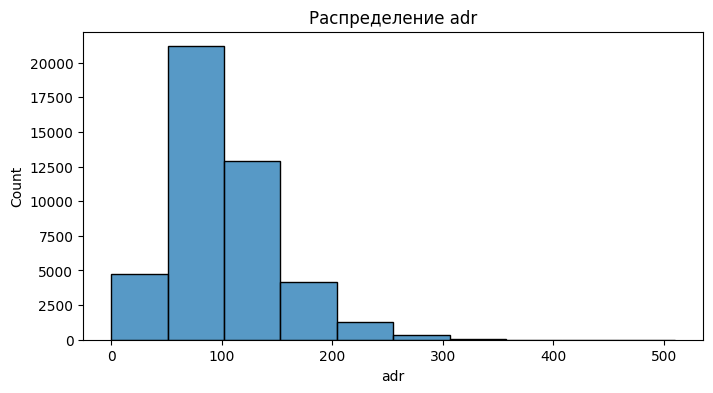

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df["adr"].dropna(), bins=10)
plt.title("Распределение adr")
plt.xlabel("adr")
plt.show()

In [ ]:
quantiles = [0.1, 0.25, 0.5, 1]
for q in quantiles:
    th = df["adr"].quantile(q)
    e_df = df[df["adr"] < th]
    v = e_df["is_canceled"].value_counts()
    print(f"{q * 100}%")
    print(v)

10.0%
is_canceled
0    3788
1     676
Name: count, dtype: int64
25.0%
is_canceled
0    8220
1    2939
Name: count, dtype: int64
50.0%
is_canceled
0    16043
1     6173
Name: count, dtype: int64
100%
is_canceled
0    31353
1    13284
Name: count, dtype: int64


Выводы:

*  Большинство гостей не вносит изменения в бронирование и не использует депозит.
*  Клиенты c залогом в размере полной стоимости проживания очень часто отменяют бронирование.
*  Очень слабая зависимость отмены заказа и времени ожидания.
*  Отмен среди корпоративных клиентов и тех, кто путешествует группой, меньше.
*  В среднем, чем дешевле номер, тем меньше вероятность его отмены.


